In [1]:
#Packages import

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
#Dataframe import

df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')

df.drop_duplicates(inplace = True) # I remove possible duplicates

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# Goal
* The main goal of the project is to analyze factors more likely to contribute to the development of depression in individuals.
* Also, the development of a model aiming at predicting whether a person could be suffering of depression, based on specific features, is in scope.

# 1) EDA (Exploratory Data Analysis)

In [3]:
# Here I start to analyze data.
# I already noticed above that "Work Pressure" is populated only for workers, while "Academic pressure" is only for students. I will create a single "pressure" 
# column, and a "satisfaction" one, following the same principle.

df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [4]:
# let's rename the columns, so that they are easier to use


df.columns = df.columns.str.lower().str.replace(' ','_')

df.rename(columns={
    'working_professional_or_student' : 'work_situation',
    'have_you_ever_had_suicidal_thoughts_?' : 'suicidal_thoughts',
    'work/study_hours' : 'effort_hours',
    'family_history_of_mental_illness': 'family_mental_illness'
}, inplace = True
         )

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,age,city,work_situation,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
# I create two columns to account for satisfaction and pressure, work/study related

df['satisfaction'] = df[['study_satisfaction', 'job_satisfaction']].max(axis = 1)
df['pressure'] = df[['academic_pressure', 'work_pressure']].max(axis = 1)

df = df.drop(['academic_pressure', 'work_pressure','study_satisfaction', 'job_satisfaction'], axis = 1)

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,age,city,work_situation,profession,cgpa,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression,satisfaction,pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,4.0,5.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,4.0,5.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,1.0,3.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,2.0,5.0


In [6]:
df.describe()   

,id,age,cgpa,effort_hours,financial_stress,depression,satisfaction,pressure
count,140700.000000,140700.000000,27898.000000,140700.000000,140696.000000,140700.000000,140685.000000,140679.000000
mean,70349.500000,40.388621,7.658636,6.252679,2.988983,0.181713,2.968568,3.027410
std,40616.735775,12.384099,1.464466,3.853615,1.413633,0.385609,1.405226,1.401947
min,0.000000,18.000000,5.030000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,35174.750000,29.000000,6.290000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,70349.500000,42.000000,7.770000,6.000000,3.000000,0.000000,3.000000,3.000000
75%,105524.250000,51.000000,8.920000,10.000000,4.000000,0.000000,4.000000,4.000000
max,140699.000000,60.000000,10.000000,12.000000,5.000000,1.000000,5.000000,5.000000


In [7]:
df.isna().sum() / len(df)

id                       0.000000
name                     0.000000
gender                   0.000000
age                      0.000000
city                     0.000000
work_situation           0.000000
profession               0.260341
cgpa                     0.801720
sleep_duration           0.000000
dietary_habits           0.000028
degree                   0.000014
suicidal_thoughts        0.000000
effort_hours             0.000000
financial_stress         0.000028
family_mental_illness    0.000000
depression               0.000000
satisfaction             0.000107
pressure                 0.000149
dtype: float64

# I notice that:

* satisfaction, pressure, degree, dietary_habits, financial_stress are missing a minuscule % of row. I'll drop these rows
* name is useless, I'll drop this feature
* cgpa is missing for >80% of rows. I'll drop the feature, as I think that estimating all rows would require too many assumptions.
* profession is missing for roughly 26% of the dataframe. I will try to estimate this and see how my model behaves with this feature included.

In [8]:
df = df.drop(['cgpa'], axis = 1)

df.dropna(subset = ['satisfaction', 'pressure', 'degree', 'dietary_habits', 'financial_stress', 'name'], inplace=True)

df.head()

,id,name,gender,age,city,work_situation,profession,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression,satisfaction,pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


<Axes: >

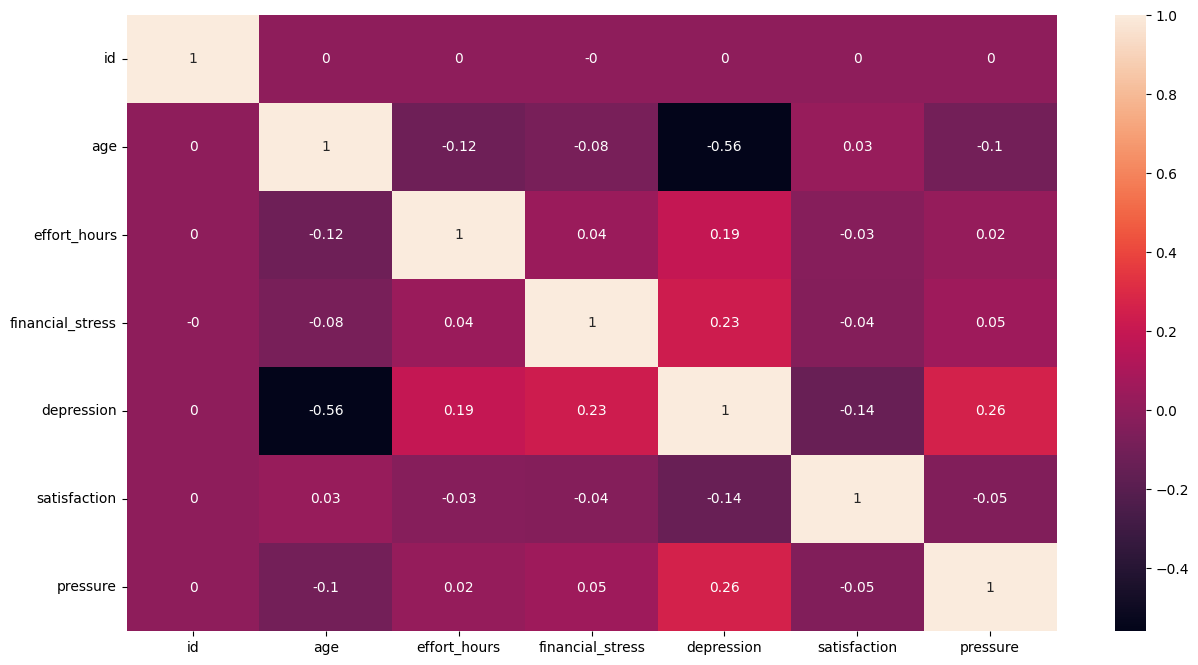

In [9]:
# By looking at correlations between variables I see there is no strong correlation between numeric features (no multicollinearity, this is good).
# Depression seems negatively correlated with age, which may have sense: as a person grows older he/she might able to better control variables which impact on his/her mental wellbeing, 
# while younger people might be more negatively impacted by financial stress and pressure (maybe they can hardly bear these issues?). 

sns.heatmap(df.select_dtypes(include=['number']).corr().round(2),
            annot=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

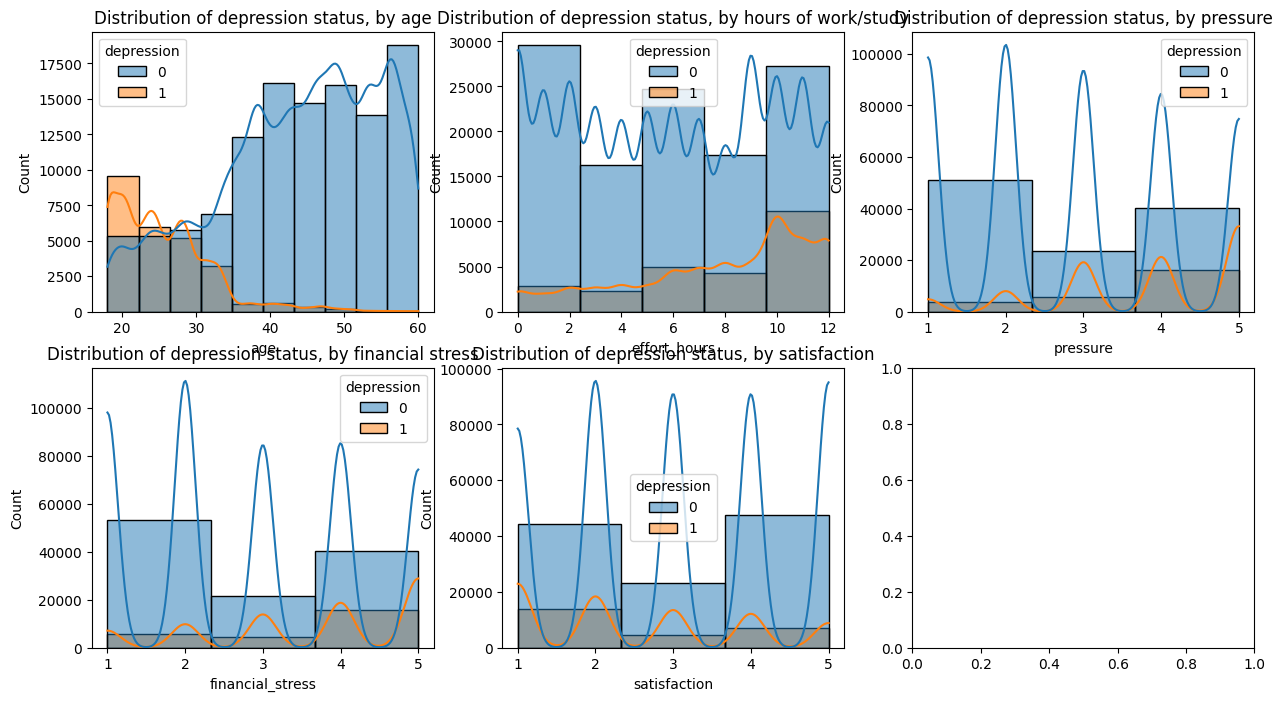

In [10]:
# Let's draw some histogram

fig, ax = plt.subplots(nrows = 2,
                      ncols = 3)


sns.histplot(ax = ax[0,0],
             data = df,
             x = 'age',
             hue = 'depression',
             kde = True,
             bins = 10)

ax[0,0].set_title('Distribution of depression status, by age')


sns.histplot(ax = ax[0,1],
                   data = df,
                   x = 'effort_hours',
                   hue = 'depression',
                   kde = True,
                   bins = 5)

ax[0,1].set_title('Distribution of depression status, by hours of work/study')


sns.histplot(ax = ax[0,2],
                   data = df,
                   x = 'pressure',
                   hue = 'depression',
                   kde = True,
                   bins = 3)

ax[0,2].set_title('Distribution of depression status, by pressure')


sns.histplot(ax = ax[1,0],
             data = df,
             x = 'financial_stress',
             hue = 'depression',
             kde = True,
             bins = 3)

ax[1,0].set_title('Distribution of depression status, by financial stress')


sns.histplot(ax = ax[1,1],
             data = df,
             x = 'satisfaction',
             hue = 'depression',
             kde = True,
             bins = 3)

ax[1,1].set_title('Distribution of depression status, by satisfaction');

# A few initial observations:

* Apparently in case of depression age is skewed toward lower values, concentrated on people <30. Depression is concentrated in younger age classes.
* Depressed people have high effort hours. Working longer hours apprently impacts depression
* Low satisfaction, high financial stress, high work/study pressure apparently are positively correlated to depression (even if I don't see a clear pattern yet).
* CGPA seems not correlated to depression: distribution for depressed and non-depressed people is similar, altough more concentrated on 8-9 for depressed people. 

# Prossimi step:
* Fillna() --> most frequent
* Encoding (anche ordinal) 
* Modelli

In [11]:
df.head()

,id,name,gender,age,city,work_situation,profession,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression,satisfaction,pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [12]:
cols_to_be_dropped = ['name']
categorical_cols = ['gender', 'city','work_situation', 'profession','degree','suicidal_thoughts','family_mental_illness']
ordinal_cols = ['sleep_duration', 'dietary_habits']

In [13]:
pd.pivot_table(df, index = ['dietary_habits'], values = ['depression'], aggfunc = 'count')

# For dietary habits I notice there are 3 macro-classes to be put in order: "Unhealthy", "Moderate", "Healthy".
# I will drop the rest, since I think that correcting the rest would be a loss of time (just 1-2 cases per class), for just a few additional cases.

,depression
dietary_habits,
1.0,1
2,1
3,1
BSc,1
Class 12,1
Electrician,1
Gender,1
Healthy,44734
Hormonal,1


In [14]:
df = df.loc[(df['dietary_habits'] == 'Unhealthy') | (df['dietary_habits'] =='Moderate') | (df['dietary_habits'] =='Healthy')]

df

,id,name,gender,age,city,work_situation,profession,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression,satisfaction,pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1,4.0,5.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,4.0,5.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0,1.0,3.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0,2.0,5.0


In [15]:
# There is a significant problem with the sleep_duration column: too many unuseful groups and some values which where wrongly specified.
# I need to find a solution. I'll define a function to level out the categories in: <5, 5-6, 6-7, 7-8, >8

pd.pivot_table(df, index = ['sleep_duration'], values = ['depression'], aggfunc = 'count')

,depression
sleep_duration,
1-2 hours,1
1-3 hours,1
1-6 hours,4
10-11 hours,2
10-6 hours,1
2-3 hours,5
3-4 hours,12
3-6 hours,1
35-36 hours,1


In [16]:
def regroup_sleep_hours(sleep_duration):
    sleep_duration = sleep_duration.replace(' hours' , '')
    sleep_duration = sleep_duration.replace('Less than ' , '<=')
    sleep_duration = sleep_duration.replace('More than ' , '>=')

    # <=5, 5-6, 7-8, >8
    
    if '-' in sleep_duration:

        if int(max(sleep_duration.split('-'))) == 5:
            return '<=5'

        elif (int(max(sleep_duration.split('-'))) > 5) & (int(max(sleep_duration.split('-'))) < 7):
            return '6-7'

        elif int(max(sleep_duration.split('-'))) >= 8:
            return '>=8'

    elif '<=' in sleep_duration:
        return sleep_duration
    
    elif '>=' in sleep_duration:
        return sleep_duration
        
    else:
        return 'to be dropped'
    

In [17]:
df['sleep_duration'] = df['sleep_duration'].apply(regroup_sleep_hours)


pd.pivot_table(df, index = ['sleep_duration'], values = ['depression'], aggfunc = 'count')

,depression
sleep_duration,
6-7,32138
<=5,38769
>=8,69687
to be dropped,17


In [18]:
df = df.loc[df['sleep_duration'] != 'to be dropped']

df

,id,name,gender,age,city,work_situation,profession,sleep_duration,dietary_habits,degree,suicidal_thoughts,effort_hours,financial_stress,family_mental_illness,depression,satisfaction,pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,>=8,Healthy,BHM,No,1.0,2.0,No,0,2.0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,<=5,Unhealthy,LLB,Yes,7.0,3.0,No,1,3.0,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,6-7,Healthy,B.Pharm,Yes,3.0,1.0,No,1,2.0,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,<=5,Moderate,BBA,Yes,10.0,1.0,Yes,1,1.0,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,6-7,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,6-7,Unhealthy,Class 12,No,2.0,4.0,Yes,1,4.0,5.0
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,>=8,Moderate,B.Tech,Yes,6.0,5.0,Yes,0,4.0,5.0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,>=8,Moderate,B.Com,No,4.0,4.0,No,0,1.0,3.0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,6-7,Moderate,ME,Yes,10.0,1.0,No,0,2.0,5.0


In [19]:
# Let's look at how sparse are profession, degree, and city

pd.pivot_table(df, index = ['profession'], values = ['depression'], aggfunc = 'count').sort_values(by=['depression'], ascending = False)

,depression
profession,
Teacher,24899
Content Writer,7814
Architect,4369
Consultant,4226
HR Manager,4022
...,...
Pranav,1
MBBS,1
Medical Doctor,1


<Axes: xlabel='count', ylabel='profession'>

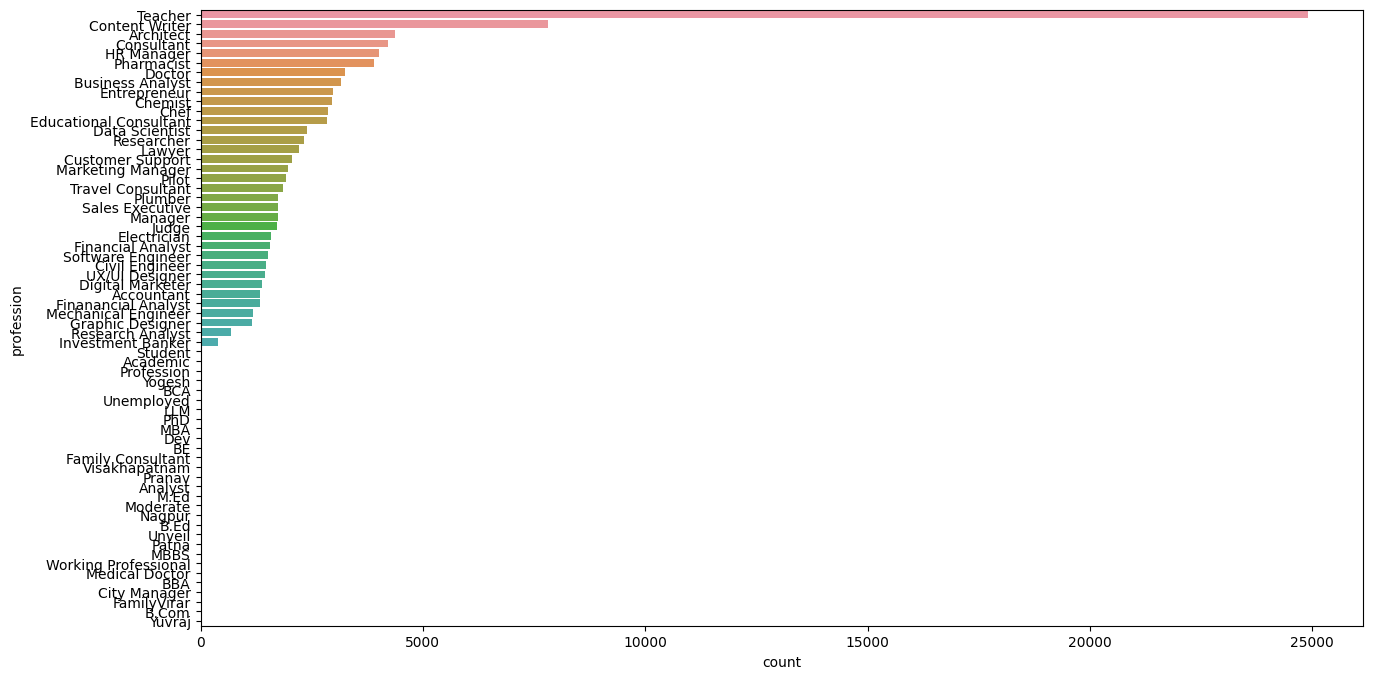

In [20]:
sns.countplot(data = df, 
              y = 'profession',
              # stat = 'percent',
              order = df['profession'].value_counts().index)

<Axes: xlabel='count', ylabel='degree'>

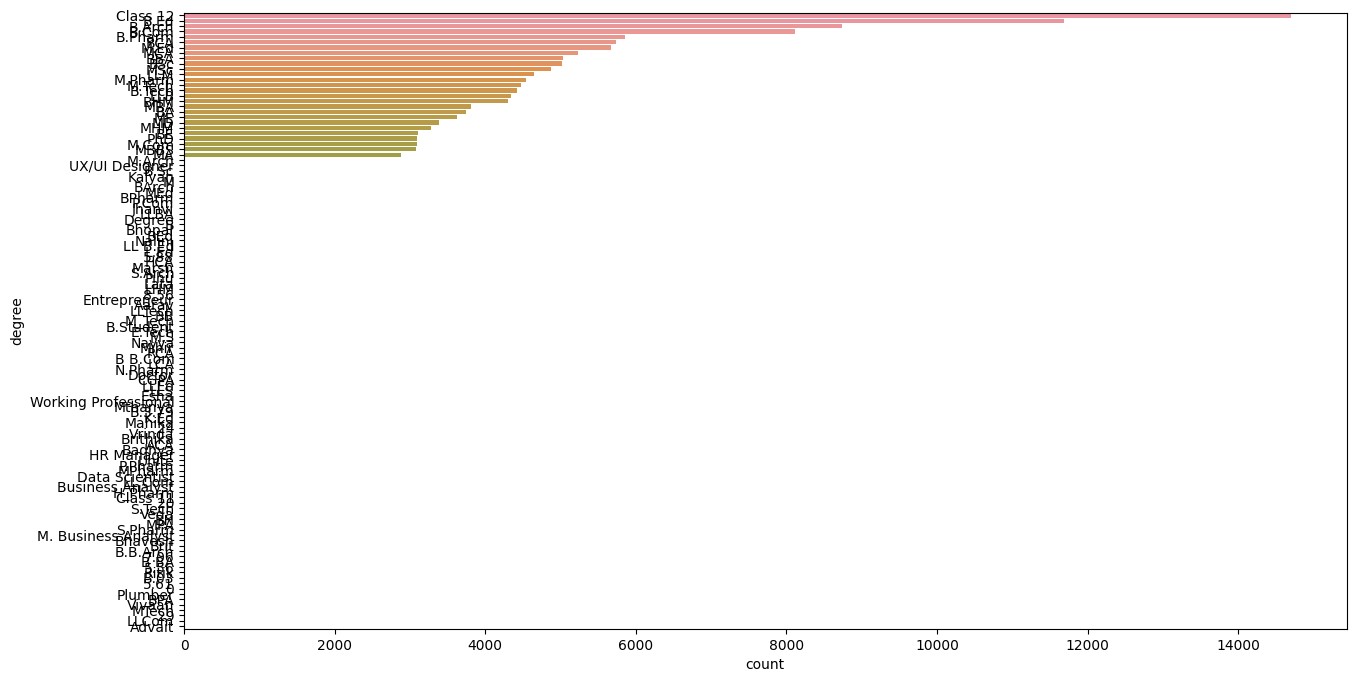

In [21]:
sns.countplot(data = df, 
              y = 'degree',
              # stat = 'percent',
              order = df['degree'].value_counts().index)

Next steps:

I need to decide:
- Degree: keep it or drop it? I think i will drop it, too difficult to group it.
- Profession: keep it or drop it? Maybe I can group in macro categories (Medical, Business, Academic, etc...)
- Scaling
- Encoding
- Run a few models and see how they perform
  ....